<a href="https://colab.research.google.com/github/kapetanioyy/datastories_for_emme/blob/main/final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

import pandas as pd

# Use the correct path after mounting
oly = pd.read_excel("/content/drive/MyDrive/report1.xlsx") # Changed path to reflect mounted drive location

Mounted at /content/drive


In [ ]:
oly

,type,source,title,text,categories,sentiment,Unnamed: 6,date,time,link
0,web,palo.gr,Ολυμπιακός: Η παρακάμερα του δεύτερου τελικού ...,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...,CONFERENCE LEAUGE,Negative,NaN,2024-06-08,23:59:28,https://www.palo.gr/basketball/olympiakos-i-pa...
1,web,difernews.gr,Ο θρύλος έβαλε και 5ο αστέρι στη φανέλα του,Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...,CONFERENCE LEAUGE,Positive,NaN,2024-06-08,23:57:42,https://difernews.gr/o-thrylos-evale-kai-5o-as...
2,web,basket247.gr,"Παπανικολάου: «Καλό ταξίδι Πάρη μου, αφανής ήρ...","Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ...",CONFERENCE LEAUGE,Positive,NaN,2024-06-08,23:55:02,https://www.basket247.gr/ellada/item/104204-pa...
3,web,gavros.gr,Ο Θρύλος «χτίζει» το «αύριο» (και) με την πείρ...,"Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ...",CONFERENCE LEAUGE,Positive,NaN,2024-06-08,23:52:10,https://www.gavros.gr/article/podosfairo/37812...
4,web,thermonews.gr,Θέμης Αδαμαντίδης: «Η κακή μου φήμη με πήγε πίσω»,Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...,CONFERENCE LEAUGE,Neutral,NaN,2024-06-08,23:51:02,https://thermonews.gr/%ce%b5%ce%bb%ce%bb%ce%ac...
...,...,...,...,...,...,...,...,...,...,...
4995,web,koutipandoras.gr,"Πεινάγανε τα παιδάκια του, του καψερού",Κλαίνε τα βουνά και οι κάμποι.\nΟ\nΚυριάκος Μη...,CONFERENCE LEAUGE,Neutral,NaN,2024-06-05,21:57:01,https://www.koutipandoras.gr/article/peinagane...
4996,web,to10.gr,Προ Ρέκο- Ολυμπιακός 13-11 πεν. (9-9 κ.δ.) : Σ...,Ο Ολυμπιακός συγκλονισε απέναντι στην Προ Ρέκο...,CONFERENCE LEAUGE,Neutral,NaN,2024-06-05,21:56:29,https://www.to10.gr/sport/polo/2983686/pro-rek...
4997,web,sport-fm.gr,Στο ΟΑΚΑ ο Γιάννης Αντετοκούνμπο για τον πρώτο...,Ο Γιάννης Αντετοκούνμπο μετά το Βερολίνο και τ...,CONFERENCE LEAUGE,Positive,NaN,2024-06-05,21:56:13,https://www.sport-fm.gr/article/basket/greece/...
4998,web,palo.gr,Live Streaming: Παναθηναϊκός - Ολυμπιακός (1η ...,Δείτε τον αγώνα ΕΔΩ. Άρχισε ο αγώνας. O Γιάννη...,CONFERENCE LEAUGE,Neutral,NaN,2024-06-05,21:56:12,https://www.palo.gr/sports/live-streaming-pana...


In [ ]:
len(oly)

5000

In [ ]:
oly.head()

,type,source,title,text,categories,sentiment,Unnamed: 6,date,time,link
0,web,palo.gr,Ολυμπιακός: Η παρακάμερα του δεύτερου τελικού ...,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...,CONFERENCE LEAUGE,Negative,NaN,2024-06-08,23:59:28,https://www.palo.gr/basketball/olympiakos-i-pa...
1,web,difernews.gr,Ο θρύλος έβαλε και 5ο αστέρι στη φανέλα του,Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...,CONFERENCE LEAUGE,Positive,NaN,2024-06-08,23:57:42,https://difernews.gr/o-thrylos-evale-kai-5o-as...
2,web,basket247.gr,"Παπανικολάου: «Καλό ταξίδι Πάρη μου, αφανής ήρ...","Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ...",CONFERENCE LEAUGE,Positive,NaN,2024-06-08,23:55:02,https://www.basket247.gr/ellada/item/104204-pa...
3,web,gavros.gr,Ο Θρύλος «χτίζει» το «αύριο» (και) με την πείρ...,"Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ...",CONFERENCE LEAUGE,Positive,NaN,2024-06-08,23:52:10,https://www.gavros.gr/article/podosfairo/37812...
4,web,thermonews.gr,Θέμης Αδαμαντίδης: «Η κακή μου φήμη με πήγε πίσω»,Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...,CONFERENCE LEAUGE,Neutral,NaN,2024-06-08,23:51:02,https://thermonews.gr/%ce%b5%ce%bb%ce%bb%ce%ac...


In [ ]:
oly_df = oly[['date','text' ]]

In [ ]:
oly_df.tail()

,date,text
4995,2024-06-05,Κλαίνε τα βουνά και οι κάμποι.\nΟ\nΚυριάκος Μη...
4996,2024-06-05,Ο Ολυμπιακός συγκλονισε απέναντι στην Προ Ρέκο...
4997,2024-06-05,Ο Γιάννης Αντετοκούνμπο μετά το Βερολίνο και τ...
4998,2024-06-05,Δείτε τον αγώνα ΕΔΩ. Άρχισε ο αγώνας. O Γιάννη...
4999,2024-06-05,Ο Ολυμπιακός ηττήθηκε στα πέναλτι (13-11) από ...


In [ ]:
oly_df.dtypes

date    object
text    object
dtype: object

In [ ]:
oly_df['datetime'] = pd.to_datetime(oly_df['date'], format='%Y-%m-%d')

<ipython-input-17-26632a63d331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oly_df['datetime'] = pd.to_datetime(oly_df['date'], format='%Y-%m-%d')


In [ ]:
oly_df.dtypes

date                object
text                object
datetime    datetime64[ns]
dtype: object

In [ ]:
oly_df.head(1)

,date,text,datetime
0,2024-06-08,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...,2024-06-08


In [ ]:
short_oly_df = oly_df[['datetime','text' ]]

In [ ]:
short_oly_df.head()

,datetime,text
0,2024-06-08,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...
1,2024-06-08,Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...
2,2024-06-08,"Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ..."
3,2024-06-08,"Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ..."
4,2024-06-08,Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...


In [ ]:
short_oly_df.tail()

,datetime,text
4995,2024-06-05,Κλαίνε τα βουνά και οι κάμποι.\nΟ\nΚυριάκος Μη...
4996,2024-06-05,Ο Ολυμπιακός συγκλονισε απέναντι στην Προ Ρέκο...
4997,2024-06-05,Ο Γιάννης Αντετοκούνμπο μετά το Βερολίνο και τ...
4998,2024-06-05,Δείτε τον αγώνα ΕΔΩ. Άρχισε ο αγώνας. O Γιάννη...
4999,2024-06-05,Ο Ολυμπιακός ηττήθηκε στα πέναλτι (13-11) από ...


In [ ]:
short_oly_df['year'] = pd.DatetimeIndex(short_oly_df['datetime']).year
short_oly_df['month'] = pd.DatetimeIndex(short_oly_df['datetime']).month
short_oly_df['day'] = pd.DatetimeIndex(short_oly_df['datetime']).day

In [ ]:
short_oly_df.head()

,datetime,text,year,month,day
0,2024-06-08,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...,2024,6,8
1,2024-06-08,Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...,2024,6,8
2,2024-06-08,"Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ...",2024,6,8
3,2024-06-08,"Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ...",2024,6,8
4,2024-06-08,Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...,2024,6,8


<Axes: xlabel='day'>

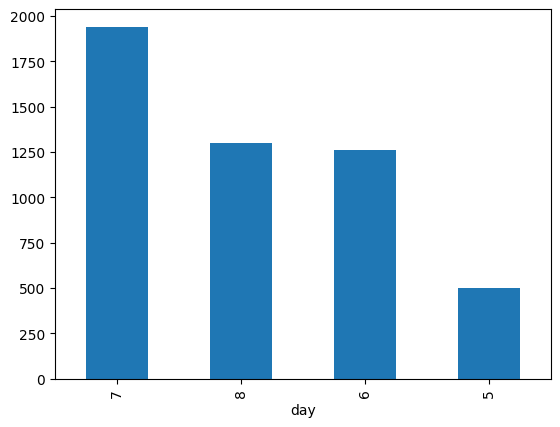

In [ ]:
short_oly_df['day'].value_counts().plot(kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_oly_df['text']

0       Δείτε τι έγινε στον δεύτερο τελικό της Basket ...
1       Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...
2       Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ...
3       Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ...
4       Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...
                              ...                        
4995    Κλαίνε τα βουνά και οι κάμποι.\nΟ\nΚυριάκος Μη...
4996    Ο Ολυμπιακός συγκλονισε απέναντι στην Προ Ρέκο...
4997    Ο Γιάννης Αντετοκούνμπο μετά το Βερολίνο και τ...
4998    Δείτε τον αγώνα ΕΔΩ. Άρχισε ο αγώνας. O Γιάννη...
4999    Ο Ολυμπιακός ηττήθηκε στα πέναλτι (13-11) από ...
Name: text, Length: 5000, dtype: object

In [ ]:
text = short_oly_df['text'].str.cat(sep = ' ')

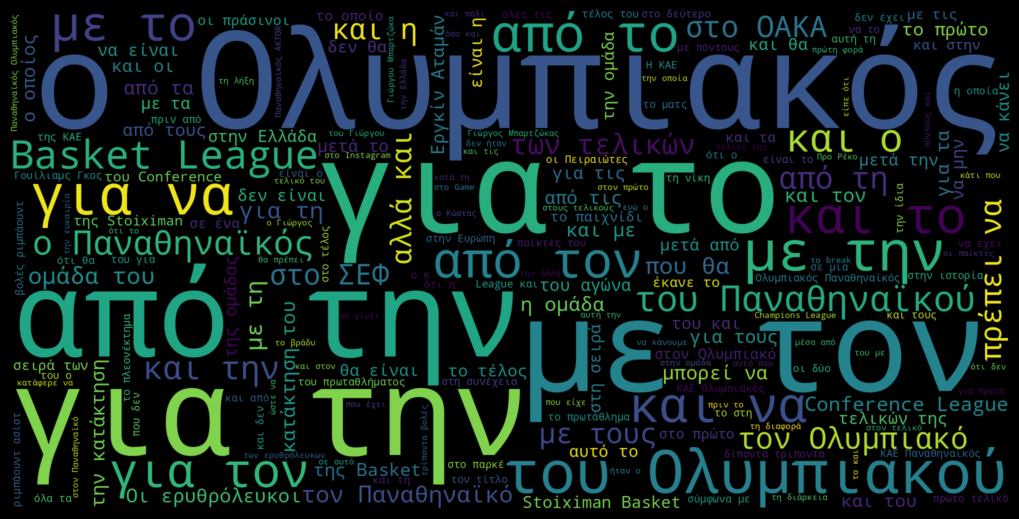

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text) # το όνομα του κειμένου
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

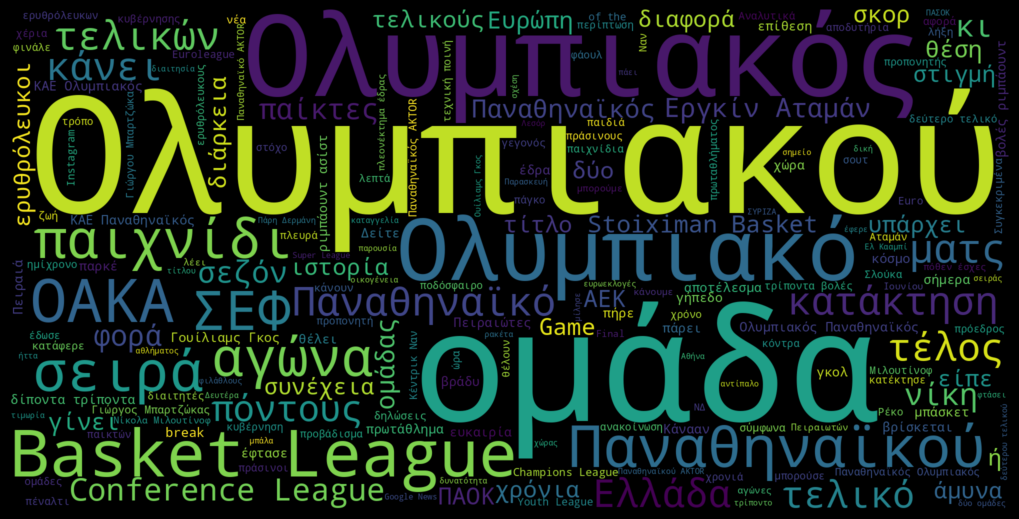

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc = nlp(oly_df['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Πάνω πάνω
από από
το ο
χαρακτηριστικό χαρακτηριστικός
έμβλημα έμβλημα
του ο
Ολυμπιακού Ολυμπιακού
προστέθηκε προστέθηκε
ακόμη ακόμα
ένα ένας
αστέρι αστέρι
, ,
διαφορετικό διαφορετικός
από από
τα ο
άλλα άλλος
, ,

 

το ο
οποίο οποίος
ξεχωρίζει ξεχωρίζω
και και
αναφέρεται αναφέρω
στην σε ο
κατάκτηση κατάκτηση
της ο
ευρωπαϊκής ευρωπαϊκός
κούπας κούπας
του ο
UEFA UEFA
Europa Europa
Conference Conference
League Leagueς
κόντρα κόντρο
στη σε ο
Φιορεντίνα Φιορεντίνα
στην σε ο
OPAP OPAP
Arena Arena
. .

 

Έτσι Έτσι
, ,
πάνω πάνω
από από
τα ο
τέσσερα τέσσερα
αστέρια αστέριο
τα ο
οποία οποίος
αφορούν αφορώ
τα ο
47 47
πρωταθλήματα πρωταθλήμα
Ελλάδας Ελλάδα
, ,
φιγουράρει φιγουράρω
αυτό αυτός
που που
αναφέρεται αναφέρω
στην σε ο
πρώτη πρώτος
ευρωπαϊκή ευρωπαϊκός
διασυλλογική διασυλλογικός
επιτυχία επιτυχία
στην σε ο
Ελλάδα Ελλάδα
. .

 

Αυτή αυτός
είναι είμαι
η ο
11η 11ος
αλλαγή αλλαγή
που που
γίνεται γίνομαι
στο σε ο
έμβλημα έμβλημα
του ο
ποδοσφαιρικού ποδοσφαιρικός
τμήματος τμήμα
του ο
συλλόγο

In [ ]:
' '.join(token.lemma_ for token in doc)

'πάνω από ο χαρακτηριστικός έμβλημα ο Ολυμπιακού προστέθηκε ακόμα ένας αστέρι , διαφορετικός από ο άλλος , \n ο οποίος ξεχωρίζω και αναφέρω σε ο κατάκτηση ο ευρωπαϊκός κούπας ο UEFA Europa Conference Leagueς κόντρο σε ο Φιορεντίνα σε ο OPAP Arena . \n Έτσι , πάνω από ο τέσσερα αστέριο ο οποίος αφορώ ο 47 πρωταθλήμα Ελλάδα , φιγουράρω αυτός που αναφέρω σε ο πρώτος ευρωπαϊκός διασυλλογικός επιτυχία σε ο Ελλάδα . \n αυτός είμαι ο 11ος αλλαγή που γίνομαι σε ο έμβλημα ο ποδοσφαιρικός τμήμα ο συλλόγο ο πειραιά . \n ο πεντάστερος πλέον Ολυμπιακός ξεκινώ να προσθέτω αστέριο σε ο δαφνωστεφανωμένος έφηβο από ο 2001 . \n Δείτε ο νέος λόγκος : \n Thema Insights \n ο μυθικός εμπειρία Tomorrowland 2024 σε περιμένω \n 06.06.2024 , 10:56 \n ο βιωσιμότητα ο πλανήτη είμαι σε ο χέρι σου \n 04.06.2024 , 17:38 \n ο σειρά αντηλιακός που κάνω καλός σε εγώ και σε ο περιβάλλον'

In [ ]:
oly_df.loc[:, 'text'] = oly_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
# Check for missing values in the 'text' column
print(oly_df['text'].isnull().sum())

# Fill missing values with an empty string
oly_df['text'] = oly_df['text'].fillna('')

# Now try fitting the CountVectorizer again
matrix = vec.fit_transform(oly_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

87


<ipython-input-38-ab9810f6c77c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oly_df['text'] = oly_df['text'].fillna('')
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτ

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(5000, 13161)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
CountVectorizer(stop_words='english', binary=True)

CountVectorizer(binary=True, stop_words='english')

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [ ]:
oly_df['anger'] = wordcount_df[angry_words].sum(axis=1)

oly_df['positive'] = wordcount_df[positive_words].sum(axis=1)

oly_df['joy'] = wordcount_df[joy_words].sum(axis=1)

oly_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

oly_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

oly_df['trust'] = wordcount_df[trust_words].sum(axis=1)

oly_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

oly_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

oly_df['negative'] = wordcount_df[negative_words].sum(axis=1)

oly_df['fear'] = wordcount_df[fear_words].sum(axis=1)


<ipython-input-44-7dcf0466f133>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oly_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-44-7dcf0466f133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oly_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-44-7dcf0466f133>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
oly_df.head()

,date,text,datetime,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-06-08,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...,2024-06-08,2,0,0,0,0,1,0,0,2,0
1,2024-06-08,Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...,2024-06-08,2,2,2,0,0,3,2,0,2,2
2,2024-06-08,"Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ...",2024-06-08,0,6,6,0,5,4,5,0,1,2
3,2024-06-08,"Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ...",2024-06-08,1,3,0,1,0,5,2,2,4,3
4,2024-06-08,Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...,2024-06-08,5,12,8,6,6,7,7,1,3,2


In [ ]:
oly_df.reset_index(inplace=True)
oly_df.set_index('date', inplace=True)
oly_df

,index,text,datetime,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,,
2024-06-08,0,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...,2024-06-08,2,0,0,0,0,1,0,0,2,0
2024-06-08,1,Πάνω από το χαρακτηριστικό έμβλημα του Ολυμπια...,2024-06-08,2,2,2,0,0,3,2,0,2,2
2024-06-08,2,"Το «αντίο» του στον Πάρη Δερμάνη, έστειλε ο Κώ...",2024-06-08,0,6,6,0,5,4,5,0,1,2
2024-06-08,3,"Ερχόμενος συνήθως από τον πάγκο, ο Στέφαν Γιόβ...",2024-06-08,1,3,0,1,0,5,2,2,4,3
2024-06-08,4,Αποκλειστικά στην κάμερα του «Ακόμα δεν είδες ...,2024-06-08,5,12,8,6,6,7,7,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,4995,Κλαίνε τα βουνά και οι κάμποι.\nΟ\nΚυριάκος Μη...,2024-06-05,4,11,3,4,1,7,3,3,6,1
2024-06-05,4996,Ο Ολυμπιακός συγκλονισε απέναντι στην Προ Ρέκο...,2024-06-05,6,6,1,4,4,3,5,6,10,6
2024-06-05,4997,Ο Γιάννης Αντετοκούνμπο μετά το Βερολίνο και τ...,2024-06-05,0,2,1,0,0,2,0,0,1,0


Index(['index', 'text', 'datetime', 'anger', 'positive', 'joy', 'disgust',
       'surprise', 'trust', 'anticipation', 'sadness', 'negative', 'fear',
       '(-)αρνητικότητα | θετικότητα(+)'],
      dtype='object')


<Axes: ylabel='datetime'>

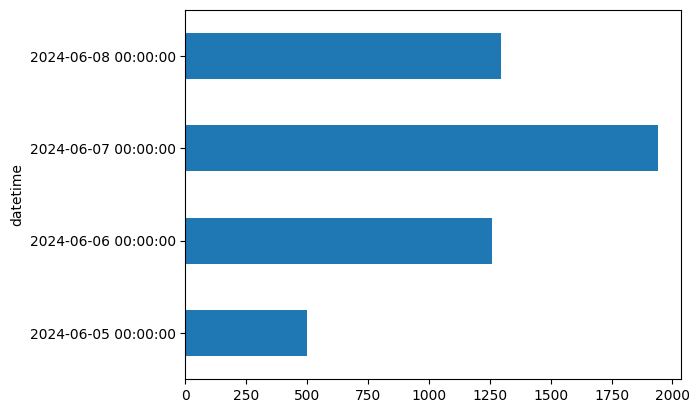

In [ ]:
import pandas as pd

# Check the column names of your DataFrame
print(oly_df.columns)

# Replace 'date' with the actual name of your date column from the output above
date_column_name = 'datetime'  # Replace 'your_date_column_name'
oly_df[date_column_name] = pd.to_datetime(oly_df[date_column_name])

# Set the date column as index
oly_df.set_index(date_column_name, inplace=True)

# Resample and count
daily_counts = oly_df['text'].resample('D').count()

# Plot
daily_counts.plot(kind='barh')

<Axes: ylabel='datetime'>

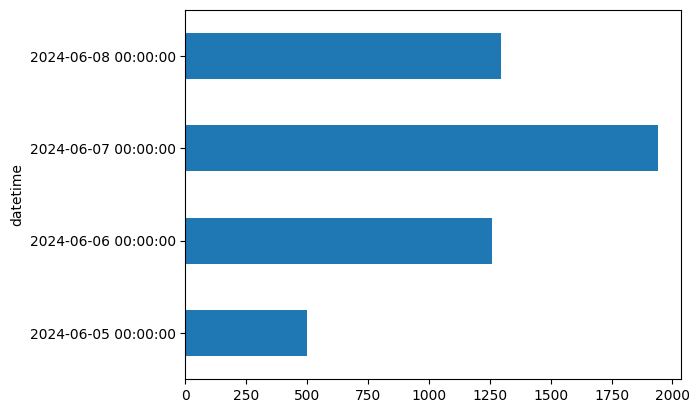

In [ ]:
oly_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='datetime'>

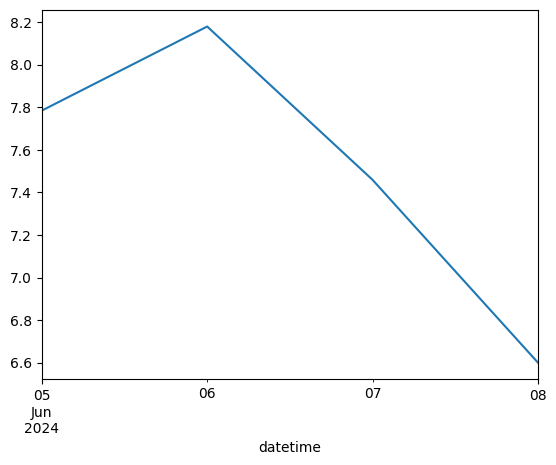

In [ ]:
oly_df['negative'].resample('D').mean().plot()

<Axes: xlabel='datetime'>

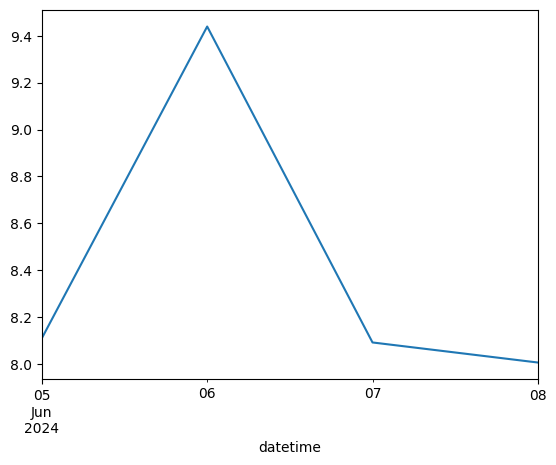

In [ ]:
oly_df['positive'].resample('D').mean().plot()

<Axes: xlabel='datetime'>

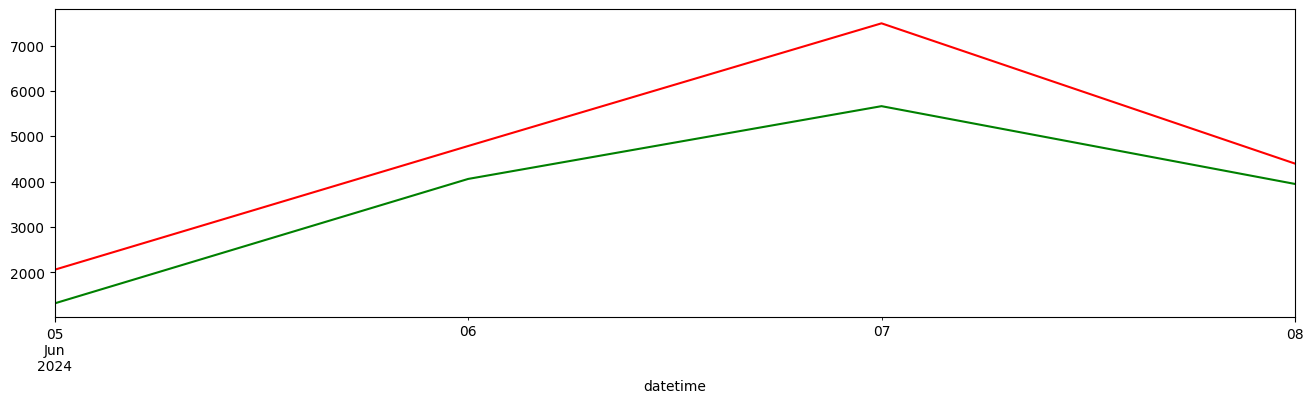

In [ ]:
ax = oly_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
oly_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='datetime'>

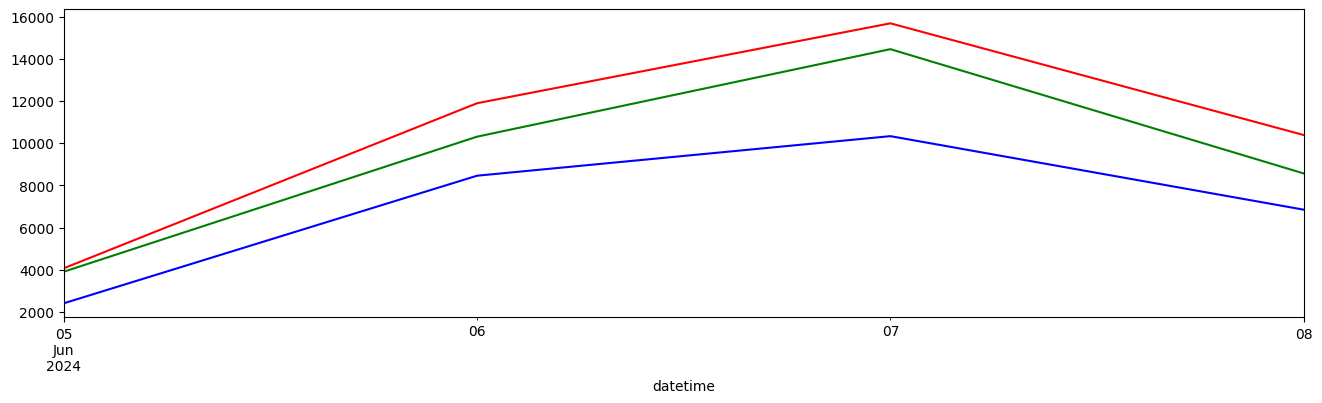

In [ ]:
ax = oly_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
oly_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
oly_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

<Axes: xlabel='date'>

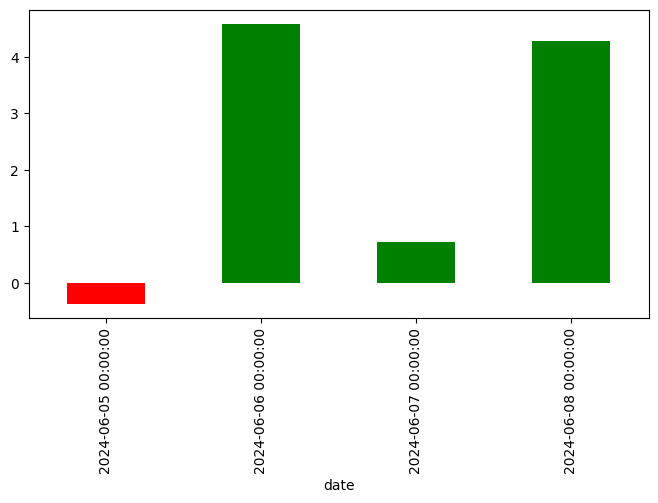

In [ ]:
# Convert the index to DatetimeIndex if it's not already
oly_df.index = pd.to_datetime(oly_df.index)

oly_df['(-)αρνητικότητα | θετικότητα(+)'] = oly_df.positive*100//oly_df[['positive','negative']].sum(
    axis=1) - oly_df.negative*100//oly_df[['positive','negative']].sum(axis=1)

oly_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                           color=(oly_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                           ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
oly_df[(oly_df['(-)αρνητικότητα | θετικότητα(+)'] == oly_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (oly_df['(-)αρνητικότητα | θετικότητα(+)'] == oly_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2024-06-08,0,0,2,-100.0
2024-06-08,5,0,1,-100.0
2024-06-08,9,0,5,-100.0
2024-06-08,13,1,0,100.0
2024-06-08,28,0,1,-100.0
...,...,...,...,...
2024-06-05,4962,0,1,-100.0
2024-06-05,4968,2,0,100.0
2024-06-05,4984,0,1,-100.0


In [ ]:
# Access rows using iloc for integer-based indexing
oly_df.iloc[[0,5,9], oly_df.columns.get_indexer(['url','title', 'text'])]

,(-)αρνητικότητα | θετικότητα(+),(-)αρνητικότητα | θετικότητα(+),text
datetime,,,
2024-06-08,-100.0,-100.0,Δείτε τι έγινε στον δεύτερο τελικό της Basket ...
2024-06-08,-100.0,-100.0,Για δανεισμό και υποχρεωτική οψιόν αγοράς κάνο...
2024-06-08,-100.0,-100.0,Κάλεσμα στον κόσμο του Ολυμπιακού για τον τρίτ...


In [ ]:
# Access rows using iloc for integer-based indexing
oly_df.iloc[[13,4968,4990], oly_df.columns.get_indexer(['url','title', 'text'])]

,(-)αρνητικότητα | θετικότητα(+),(-)αρνητικότητα | θετικότητα(+),text
datetime,,,
2024-06-08,100.0,100.0,Δώδεκα ποδοσφαιριστές των ομάδων της Stoiximan...
2024-06-05,100.0,100.0,Ο\nΚώστας Σλούκας\nέκανε δυναμικό ξεκίνημα στο...
2024-06-05,100.0,100.0,Επιμέλεια: Μιχάλης Γκιουλένογλου\nΟ Τόμας Γουό...
